In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# open pickle

fname = '/mnt/home/gwoollard/ceph/repos/cryomethods_comparison_pipeline/results/analysis_results_20240415-npix224_submission_5.pkl'

with open(fname, 'rb') as f:
    data = pickle.load(f)


<Axes: >

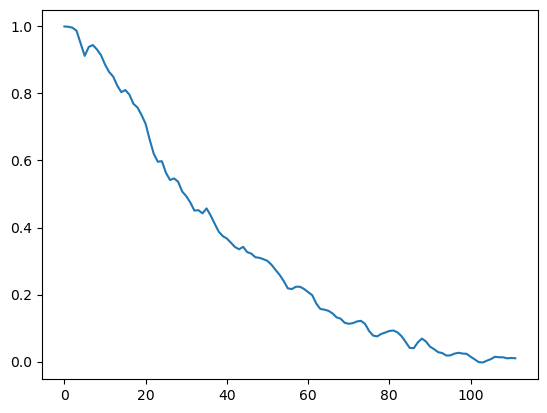

In [3]:
i,j = 0,0
fsc = data['fsc']['computed_assets']['fsc_matrix'][i,j]
pd.Series(fsc).plot()

In [28]:
metadata = pd.read_csv('/mnt/home/gwoollard/ceph/repos/cryomethods_comparison_pipeline/osf/metadata.csv')
metadata.sort_values('pc1', inplace=True)
metadata.head()


,volumes,populations_count,pc1,populations
3238,13396.mrc,1,-231.621006,0.000030
3837,32412.mrc,1,-230.330399,0.000030
3361,16057.mrc,1,-230.129599,0.000030
3541,20321.mrc,1,-229.605355,0.000030
3665,24907.mrc,2,-228.763719,0.000059


In [31]:
fscs_sorted = data['fsc']['computed_assets']['fsc_matrix'][metadata.index.tolist()]

In [40]:
threshold = 0.5
res_fsc_half = np.argmin(fscs_sorted > threshold, axis=-1)
fraction_nyquist = 0.5*res_fsc_half / fscs_sorted.shape[1]

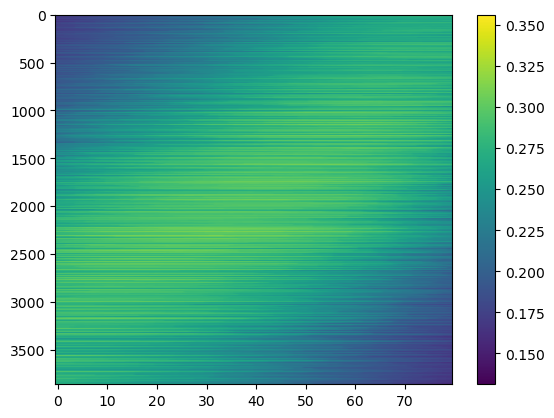

In [41]:
plt.imshow(fraction_nyquist, aspect='auto')
plt.colorbar()

In [4]:


def res_at_threshold(fsc, threshold=0.5):
    index = np.where(fsc < threshold)
    return index[0][0]


In [5]:
row_of_fscs = data['fsc']['computed_assets']['fsc_matrix'][0,:]

def across_row(row_of_fscs):
    print(row_of_fscs.shape)
    return np.apply_along_axis(res_at_threshold, 1, row_of_fscs, threshold=0.5)

across_row(data['fsc']['computed_assets']['fsc_matrix'][0,:])

results = np.empty(data['fsc']['computed_assets']['fsc_matrix'].shape[:2])
for i in range(len(data)):
    row_of_fscs = data['fsc']['computed_assets']['fsc_matrix'][i]
    results[i] = np.apply_along_axis(res_at_threshold, 1, row_of_fscs, threshold=0.5)

torch.Size([80, 112])


In [6]:
data['fsc']['computed_assets']['fsc_matrix'][0,:2].shape

torch.Size([2, 112])

In [17]:
fscs = data['fsc']['computed_assets']['fsc_matrix']
fscs.shape

torch.Size([3861, 80, 112])

In [18]:
# np.where(fscs < threshold)

In [23]:
res_fsc_half = np.argmin(fscs > threshold, axis=-1)

In [24]:
res_fsc_half.shape

torch.Size([3861, 80])